In [51]:
# mounting the  google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# these functions are useful for splitting and normalization
from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split

# import other functions we'll need for regression modeling
from sklearn.linear_model import LinearRegression

# regression error metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [53]:
df=pd.read_csv('/content/drive/MyDrive/BAPM Huskies/woxbury.txt')
df.head(2)

,TOTAL VALUE,TAX,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,4330,9965,1880,2436,1352,2.0,6,3,1,1,1,0,None
1,412.6,5190,6590,1945,3108,1976,2.0,10,4,2,1,1,0,Recent


In [54]:
df=df.drop(columns='REMODEL', axis=1)

In [55]:
df.columns

Index(['TOTAL VALUE ', 'TAX', 'LOT SQFT ', 'YR BUILT', 'GROSS AREA ',
       'LIVING AREA', 'FLOORS ', 'ROOMS', 'BEDROOMS ', 'FULL BATH',
       'HALF BATH', 'KITCHEN', 'FIREPLACE'],
      dtype='object')

In [56]:
y=df["TOTAL VALUE "]
X=df.drop(columns="TOTAL VALUE ")

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

In [58]:
X_train,X_test,y_train,y_test=train_test_split(X, y,
                                                    test_size = 0.5,
                                                    shuffle = True,
                                                    random_state = 42)

In [59]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2901, 12) (2901, 12) (2901,) (2901,)


In [60]:
y_train.head()

7       320.4
2315    337.0
5509    282.5
4233    339.4
4245    355.5
Name: TOTAL VALUE , dtype: float64

In [61]:
LR = LinearRegression()
# fit the model - one line of code - LR is now a 'model object'
LR = LR.fit(X_train, y_train)

In [62]:
# store the predictions
train_preds = LR.predict(X_train) 
test_preds = LR.predict(X_test)  

In [63]:
print("This is train R2:", r2_score(y_train, train_preds)) # train
print("This is test R2:", r2_score(y_test, test_preds)) # test

This is train R2: 0.9999999471470697
This is test R2: 0.999999948025132


In [64]:
# 
trainMAE = mean_absolute_error(y_train, train_preds)
print("This is trainMAE:", trainMAE) # train
testMAE = mean_absolute_error(y_test, test_preds)
print("This is testMAE:", testMAE) # test



This is trainMAE: 0.01943592855588311
This is testMAE: 0.01977736307574952


In [65]:

trainMSE = mean_squared_error(y_train, train_preds)
print("This is trainMSE:", trainMSE)
testMSE = mean_squared_error(y_test, test_preds)
print("This is testMSE:", testMSE)

# values between 0 and +Inf
# values closer to 0 are better

This is trainMSE: 0.0005067922451285975
This is testMSE: 0.0005235540340806817


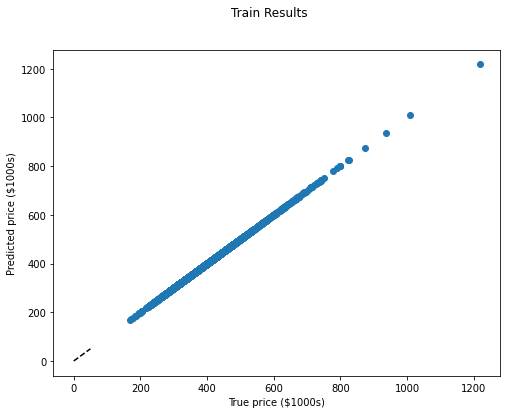

In [66]:
# a quick scatterplot for train results
# let's see how it fit
plt.figure(figsize=(8, 6))
plt.scatter(x=y_train, y=train_preds)
plt.plot([0, 50], [0, 50], '--k') # 45 degree line
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.suptitle('Train Results')
plt.show()

In [73]:
pd.DataFrame(test_preds)

,0
0,306.319809
1,305.206276
2,239.227523
3,396.462739
4,322.535481
...,...
2896,346.620461
2897,316.968830
2898,475.239251
2899,343.917178


In [74]:
trainMAE

0.01943592855588311

In [72]:
y_test

5070    306.3
1103    305.2
812     239.2
1632    396.5
1128    322.5
        ...  
484     346.6
2211    317.0
1320    475.2
3113    343.9
2555    774.1
Name: TOTAL VALUE , Length: 2901, dtype: float64